<a href="https://colab.research.google.com/github/drsennet/Graphs-GNN/blob/main/dataHandlingPyG_KarateClub.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!python --version

Python 3.10.12


In [ ]:
!python -c "import torch; print(torch.version.cuda)"

12.1


In [ ]:
# PyTorch version
!python -c "import torch; print(torch.__version__)"

2.3.0+cu121


In [ ]:
# Install required packages.
#!pip install -q torch-scatter -f https://data.pyg.org/whl/torch-2.3.0+cu121.html
#!pip install -q torch-sparse -f https://data.pyg.org/whl/torch-2.3.0+cu121.html
#!pip install -q git+https://github.com/pyg-team/pytorch_geometric.git

!pip install torch-sparse -f https://data.pyg.org/whl/torch-2.3.0+cu121.html
!pip install torch-scatter -f https://data.pyg.org/whl/torch-2.3.0+cu121.html
!pip install torch-geometric

Looking in links: https://data.pyg.org/whl/torch-2.3.0+cu121.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 30.7 MB/s eta 0:00:00
Looking in links: https://data.pyg.org/whl/torch-2.3.0+cu121.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.9/10.9 MB 61.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 4.6 MB/s eta 0:00:00


In [ ]:
 # Helper function for Visualization.
 %matplotlib inline
 import torch
 import torch.nn.functional as F
 import networkx as nx
 import matplotlib.pyplot as plt

In [ ]:
from torch_geometric.datasets import KarateClub

In [ ]:
dataset = KarateClub()

In [ ]:
print(f'Dataset: {dataset}:')
print('======================')
print(f'Number of graphs: {len(dataset)}')
print(f'Number of features: {dataset.num_features}')
print(f'Number of classes: {dataset.num_classes}')
print(f'Number of edges features: {dataset.num_edge_features}')
print(f'Number of nodes features: {dataset.num_node_features}')

Dataset: KarateClub():
Number of graphs: 1
Number of features: 34
Number of classes: 4
Number of edges features: 0
Number of nodes features: 34


### Karate Club Dataset Infomaton


# Dataset <-> data
1. data.x: Node feature matrix with shape [num_nodes, num_node_features]
2. data.edge_index: Graph connectivity in COO format with shape [2, num_edges] and type torch.long
3. data.edge_attr: Edge feature matrix with shape [num_edges, num_edge_features]
4. data.y: Target to train against (may have arbitrary shape), e.g., node-level targets of shape [num_nodes, *] or graph-level targets of shape [1, *]
5. data.pos: Node position matrix with shape [num_nodes, num_dimensions]

In [ ]:
data = dataset[0] # Get the first graph object.
print(data)

Data(x=[34, 34], edge_index=[2, 156], y=[34], train_mask=[34])


In [17]:
print('==========================================')

# gather some statistics about the graph
print(f'Number of nodes: {data.num_nodes}')
print(f'Number of Edges: {data.num_edges}')
print(f'Average node degree: {data.num_edges / data.num_nodes:.2f}')
print(f'Has isolated nodes: {data.has_isolated_nodes()}')
print(f'Has self-loops: {data.has_self_loops()}')
print(f'Is undirected: {data.is_undirected()}')
print(f'Number of features: {data.num_features}')
print(f'Is directed graph: {data.is_directed()}')
print(f'Number of edges: {data.edge_index.shape[1]}')

Number of nodes: 34
Number of Edges: 156
Average node degree: 4.59
Has isolated nodes: False
Has self-loops: False
Is undirected: True
Number of features: 34
Is directed graph: False
Number of edges: 156


In [19]:
print(f'Edge weight: {data.edge_attr}')
print(f'Graph contains isolated nodee: {data.contains_isolated_nodes()}')
print(f'Graph contains self-loops: {data.contains_self_loops()})')

Edge weight: None
Graph contains isolated nodee: False
Graph contains self-loops: False)


/usr/local/lib/python3.10/dist-packages/torch_geometric/deprecation.py:26: UserWarning: 'contains_isolated_nodes' is deprecated, use 'has_isolated_nodes' instead
  warnings.warn(out)
/usr/local/lib/python3.10/dist-packages/torch_geometric/deprecation.py:26: UserWarning: 'contains_self_loops' is deprecated, use 'has_self_loops' instead
  warnings.warn(out)


### Training Mask information

In [20]:
print('====================================================')
print(f'Number of training nodes: {data.train_mask.sum()}')
print(f'Training node label ratio: {int(data.train_mask.sum()) / data.num_nodes:.2f}')
print(f'Contains isolated nodes: {data.train_mask.any()}' )

Number of training nodes: 4
Training node label ratio: 0.12
Contains isolated nodes: True


## Node Store

In [21]:
print(data)
data.node_stores

Data(x=[34, 34], edge_index=[2, 156], y=[34], train_mask=[34])


[{'x': tensor([[1., 0., 0.,  ..., 0., 0., 0.],
         [0., 1., 0.,  ..., 0., 0., 0.],
         [0., 0., 1.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 1., 0., 0.],
         [0., 0., 0.,  ..., 0., 1., 0.],
         [0., 0., 0.,  ..., 0., 0., 1.]]), 'edge_index': tensor([[ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,
           1,  1,  1,  1,  1,  1,  1,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  3,
           3,  3,  3,  3,  3,  4,  4,  4,  5,  5,  5,  5,  6,  6,  6,  6,  7,  7,
           7,  7,  8,  8,  8,  8,  8,  9,  9, 10, 10, 10, 11, 12, 12, 13, 13, 13,
          13, 13, 14, 14, 15, 15, 16, 16, 17, 17, 18, 18, 19, 19, 19, 20, 20, 21,
          21, 22, 22, 23, 23, 23, 23, 23, 24, 24, 24, 25, 25, 25, 26, 26, 27, 27,
          27, 27, 28, 28, 28, 29, 29, 29, 29, 30, 30, 30, 30, 31, 31, 31, 31, 31,
          31, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 33, 33, 33, 33, 33,
          33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33],
    

In [22]:
data.to_dict()

{'x': tensor([[1., 0., 0.,  ..., 0., 0., 0.],
         [0., 1., 0.,  ..., 0., 0., 0.],
         [0., 0., 1.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 1., 0., 0.],
         [0., 0., 0.,  ..., 0., 1., 0.],
         [0., 0., 0.,  ..., 0., 0., 1.]]),
 'edge_index': tensor([[ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,
           1,  1,  1,  1,  1,  1,  1,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  3,
           3,  3,  3,  3,  3,  4,  4,  4,  5,  5,  5,  5,  6,  6,  6,  6,  7,  7,
           7,  7,  8,  8,  8,  8,  8,  9,  9, 10, 10, 10, 11, 12, 12, 13, 13, 13,
          13, 13, 14, 14, 15, 15, 16, 16, 17, 17, 18, 18, 19, 19, 19, 20, 20, 21,
          21, 22, 22, 23, 23, 23, 23, 23, 24, 24, 24, 25, 25, 25, 26, 26, 27, 27,
          27, 27, 28, 28, 28, 29, 29, 29, 29, 30, 30, 30, 30, 31, 31, 31, 31, 31,
          31, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 33, 33, 33, 33, 33,
          33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33],
    

Above only 4 nodes have mask value set as True, it means only 4 out of 34 nodes have community or class assignment, rest of the 30 nodes needs community assignment.

Train Mask -> In total, we are only aware of the ground-truth labels of 4 nodes (one for each community), and the task is to infer the community assignment for the remaining nodes.

In [ ]:
from IPython.display import display, HTML
display(HTML(f'<pre>{data.to_dict()}</pre>'))

In [23]:
from IPython.display import Javascript # Restrict height of output cell.
display(Javascript('''google.colab.output.setIframeHeight(0, true, {maxHeight: 300})'''))

<IPython.core.display.Javascript object>

Karate Club dataset:


*   edge_index = [2, 156]



In [24]:
edge_index = data.edge_index
print(edge_index)

tensor([[ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,
          1,  1,  1,  1,  1,  1,  1,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  3,
          3,  3,  3,  3,  3,  4,  4,  4,  5,  5,  5,  5,  6,  6,  6,  6,  7,  7,
          7,  7,  8,  8,  8,  8,  8,  9,  9, 10, 10, 10, 11, 12, 12, 13, 13, 13,
         13, 13, 14, 14, 15, 15, 16, 16, 17, 17, 18, 18, 19, 19, 19, 20, 20, 21,
         21, 22, 22, 23, 23, 23, 23, 23, 24, 24, 24, 25, 25, 25, 26, 26, 27, 27,
         27, 27, 28, 28, 28, 29, 29, 29, 29, 30, 30, 30, 30, 31, 31, 31, 31, 31,
         31, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 33, 33, 33, 33, 33,
         33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33],
        [ 1,  2,  3,  4,  5,  6,  7,  8, 10, 11, 12, 13, 17, 19, 21, 31,  0,  2,
          3,  7, 13, 17, 19, 21, 30,  0,  1,  3,  7,  8,  9, 13, 27, 28, 32,  0,
          1,  2,  7, 12, 13,  0,  6, 10,  0,  6, 10, 16,  0,  4,  5, 16,  0,  1,
          2,  3,  0,  2, 30, 32, 33,  2, 33,  0,  4

In [25]:
18*8+12

156

In [26]:
# Print as tensor
print(edge_index.t())

tensor([[ 0,  1],
        [ 0,  2],
        [ 0,  3],
        [ 0,  4],
        [ 0,  5],
        [ 0,  6],
        [ 0,  7],
        [ 0,  8],
        [ 0, 10],
        [ 0, 11],
        [ 0, 12],
        [ 0, 13],
        [ 0, 17],
        [ 0, 19],
        [ 0, 21],
        [ 0, 31],
        [ 1,  0],
        [ 1,  2],
        [ 1,  3],
        [ 1,  7],
        [ 1, 13],
        [ 1, 17],
        [ 1, 19],
        [ 1, 21],
        [ 1, 30],
        [ 2,  0],
        [ 2,  1],
        [ 2,  3],
        [ 2,  7],
        [ 2,  8],
        [ 2,  9],
        [ 2, 13],
        [ 2, 27],
        [ 2, 28],
        [ 2, 32],
        [ 3,  0],
        [ 3,  1],
        [ 3,  2],
        [ 3,  7],
        [ 3, 12],
        [ 3, 13],
        [ 4,  0],
        [ 4,  6],
        [ 4, 10],
        [ 5,  0],
        [ 5,  6],
        [ 5, 10],
        [ 5, 16],
        [ 6,  0],
        [ 6,  4],
        [ 6,  5],
        [ 6, 16],
        [ 7,  0],
        [ 7,  1],
        [ 7,  2],
        [ 

In [27]:
data.x

tensor([[1., 0., 0.,  ..., 0., 0., 0.],
        [0., 1., 0.,  ..., 0., 0., 0.],
        [0., 0., 1.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 1., 0., 0.],
        [0., 0., 0.,  ..., 0., 1., 0.],
        [0., 0., 0.,  ..., 0., 0., 1.]])

In [28]:
data.y

tensor([1, 1, 1, 1, 3, 3, 3, 1, 0, 1, 3, 1, 1, 1, 0, 0, 3, 1, 0, 1, 0, 1, 0, 0,
        2, 2, 0, 0, 2, 0, 0, 2, 0, 0])

In [29]:
data.train_mask

tensor([ True, False, False, False,  True, False, False, False,  True, False,
        False, False, False, False, False, False, False, False, False, False,
        False, False, False, False,  True, False, False, False, False, False,
        False, False, False, False])

## Graph classes

In [31]:
print(f'Number of classes: {dataset.num_classes}')
print(data)

Number of classes: 4
Data(x=[34, 34], edge_index=[2, 156], y=[34], train_mask=[34])


In [33]:
data.y # Check the four classes

tensor([1, 1, 1, 1, 3, 3, 3, 1, 0, 1, 3, 1, 1, 1, 0, 0, 3, 1, 0, 1, 0, 1, 0, 0,
        2, 2, 0, 0, 2, 0, 0, 2, 0, 0])

In [32]:
data.y.shape

torch.Size([34])

## Node Features

In [35]:
print(data.num_node_features)
print(data.num_features)
print(data.num_nodes)

34
34
34


* data.x: Node feature matrix with shape  [num_nodes, num_node_features]

In [36]:
data.x

tensor([[1., 0., 0.,  ..., 0., 0., 0.],
        [0., 1., 0.,  ..., 0., 0., 0.],
        [0., 0., 1.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 1., 0., 0.],
        [0., 0., 0.,  ..., 0., 1., 0.],
        [0., 0., 0.,  ..., 0., 0., 1.]])

In [37]:
data.x[0]

tensor([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [39]:
# data.x[34] will be out of the range
data.x[33] # all 0 to 33 features

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.])

## Graph Visualization

In [41]:
def visualize_graph(G, color):
    plt.figure(figsize=(12,12))
    plt.xticks([])
    plt.yticks([])
    nx.draw(G, pos=nx.spring_layout(G, seed=42), node_color=color,
            with_labels=False, cmap="Set2")
    plt.show()

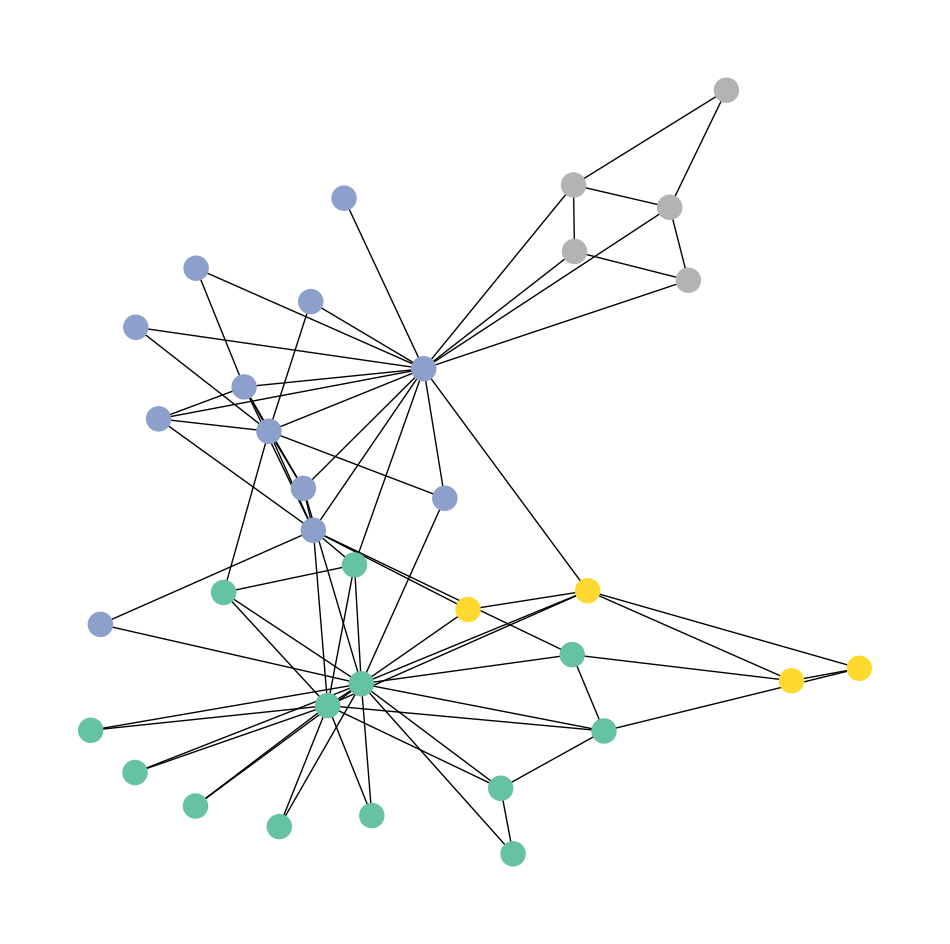

In [45]:
from torch_geometric.utils import to_networkx

karate_undirected_graph = to_networkx(data, to_undirected=True)
visualize_graph(karate_undirected_graph, color=data.y)

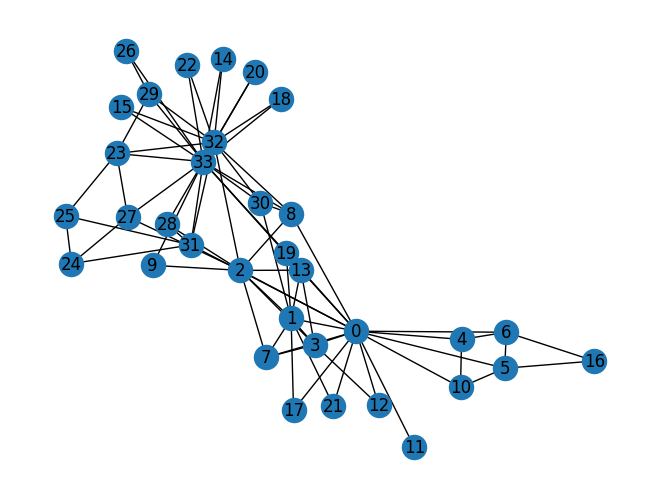

In [69]:
karate_undirected_graph = to_networkx(data, to_undirected=True)
nx.draw(karate_undirected_graph, with_labels=True)

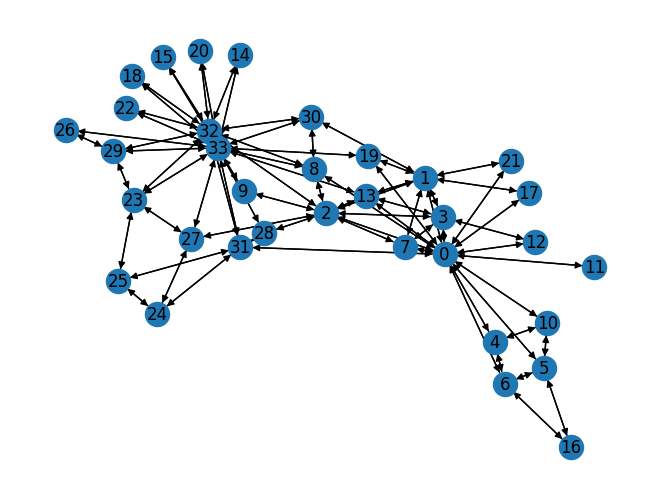

In [70]:
karate_directed_graph = to_networkx(data, to_undirected=False)
nx.draw(karate_directed_graph, with_labels=True)

In [58]:
karate_undirected_graph.nodes

NodeView((0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33))

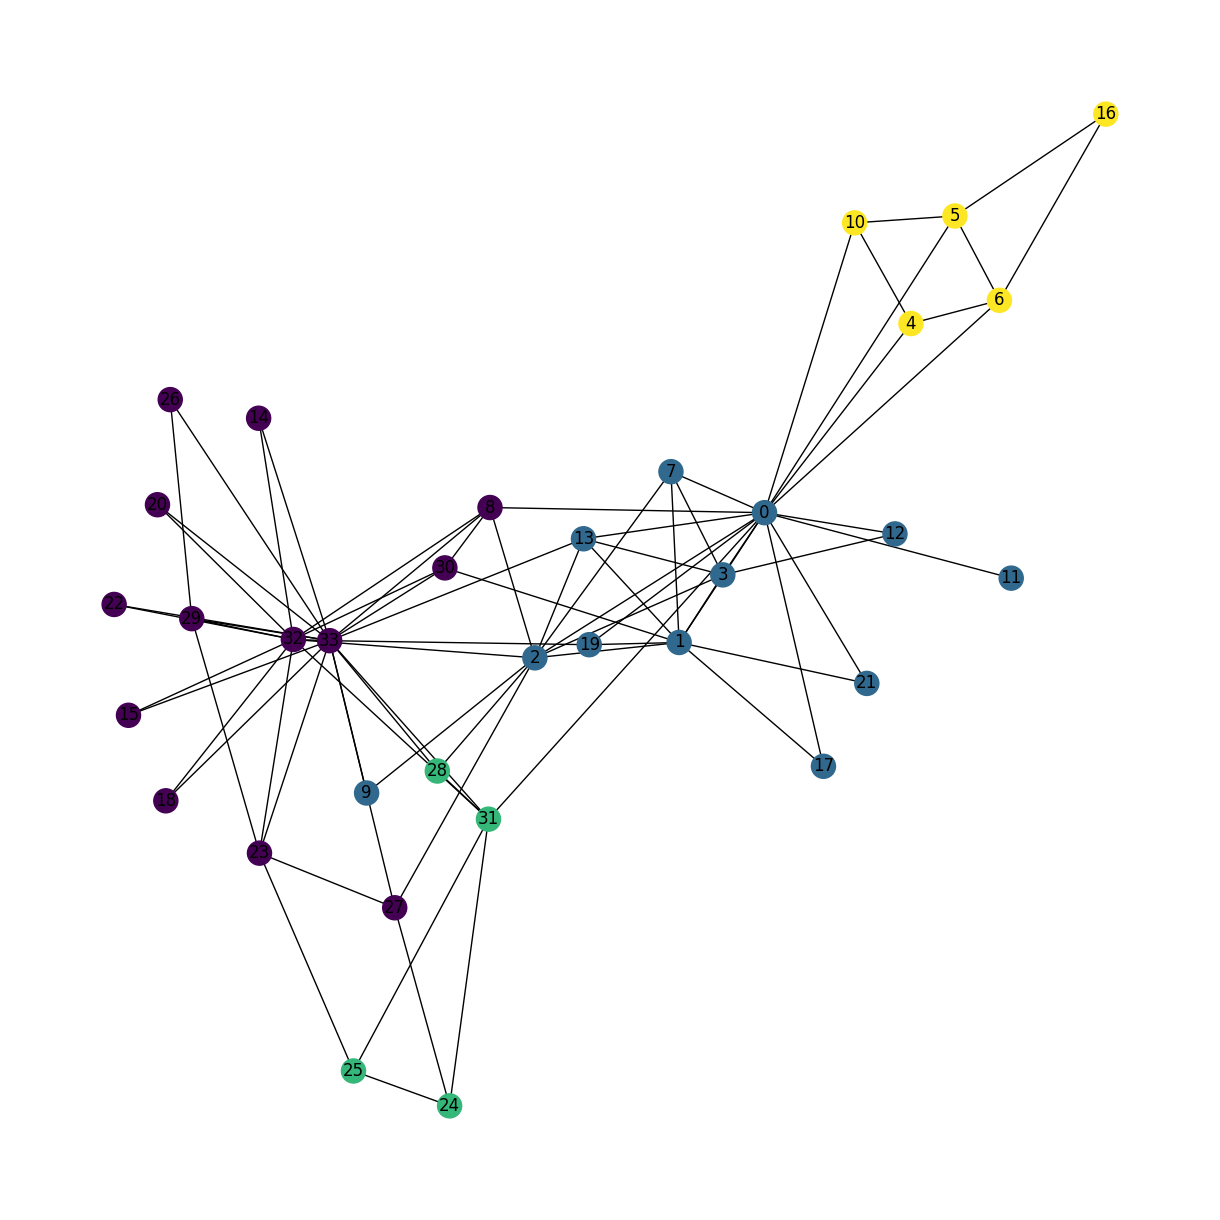

In [55]:
plt.figure(figsize=(12,12))
nx.draw(karate_undirected_graph, cmap=plt.get_cmap('viridis'), with_labels=True, node_color=data.y)
# 4 classes ae visualize

In [62]:
# Print the number of undirected edges
print(f'Number of undirected edges for the Karate Club graph: {karate_undirected_graph.number_of_edges()}')
print(f'Karate Club edges: {karate_undirected_graph.edges()}')

Number of undirected edges for the Karate Club graph: 78
Karate Club edges: [(0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (0, 8), (0, 10), (0, 11), (0, 12), (0, 13), (0, 17), (0, 19), (0, 21), (0, 31), (1, 2), (1, 3), (1, 7), (1, 13), (1, 17), (1, 19), (1, 21), (1, 30), (2, 3), (2, 7), (2, 8), (2, 9), (2, 13), (2, 27), (2, 28), (2, 32), (3, 7), (3, 12), (3, 13), (4, 6), (4, 10), (5, 6), (5, 10), (5, 16), (6, 16), (8, 30), (8, 32), (8, 33), (9, 33), (13, 33), (14, 32), (14, 33), (15, 32), (15, 33), (18, 32), (18, 33), (19, 33), (20, 32), (20, 33), (22, 32), (22, 33), (23, 25), (23, 27), (23, 29), (23, 32), (23, 33), (24, 25), (24, 27), (24, 31), (25, 31), (26, 29), (26, 33), (27, 33), (28, 31), (28, 33), (29, 32), (29, 33), (30, 32), (30, 33), (31, 32), (31, 33), (32, 33)]


In [63]:
print(karate_undirected_graph.number_of_nodes())
karate_undirected_graph.degree
# Check the undirected graph and make sure if you can match the degreea for node '0'

34


DegreeView({0: 16, 1: 9, 2: 10, 3: 6, 4: 3, 5: 4, 6: 4, 7: 4, 8: 5, 9: 2, 10: 3, 11: 1, 12: 2, 13: 5, 14: 2, 15: 2, 16: 2, 17: 2, 18: 2, 19: 3, 20: 2, 21: 2, 22: 2, 23: 5, 24: 3, 25: 3, 26: 2, 27: 4, 28: 3, 29: 4, 30: 4, 31: 6, 32: 12, 33: 17})

## Directed graph

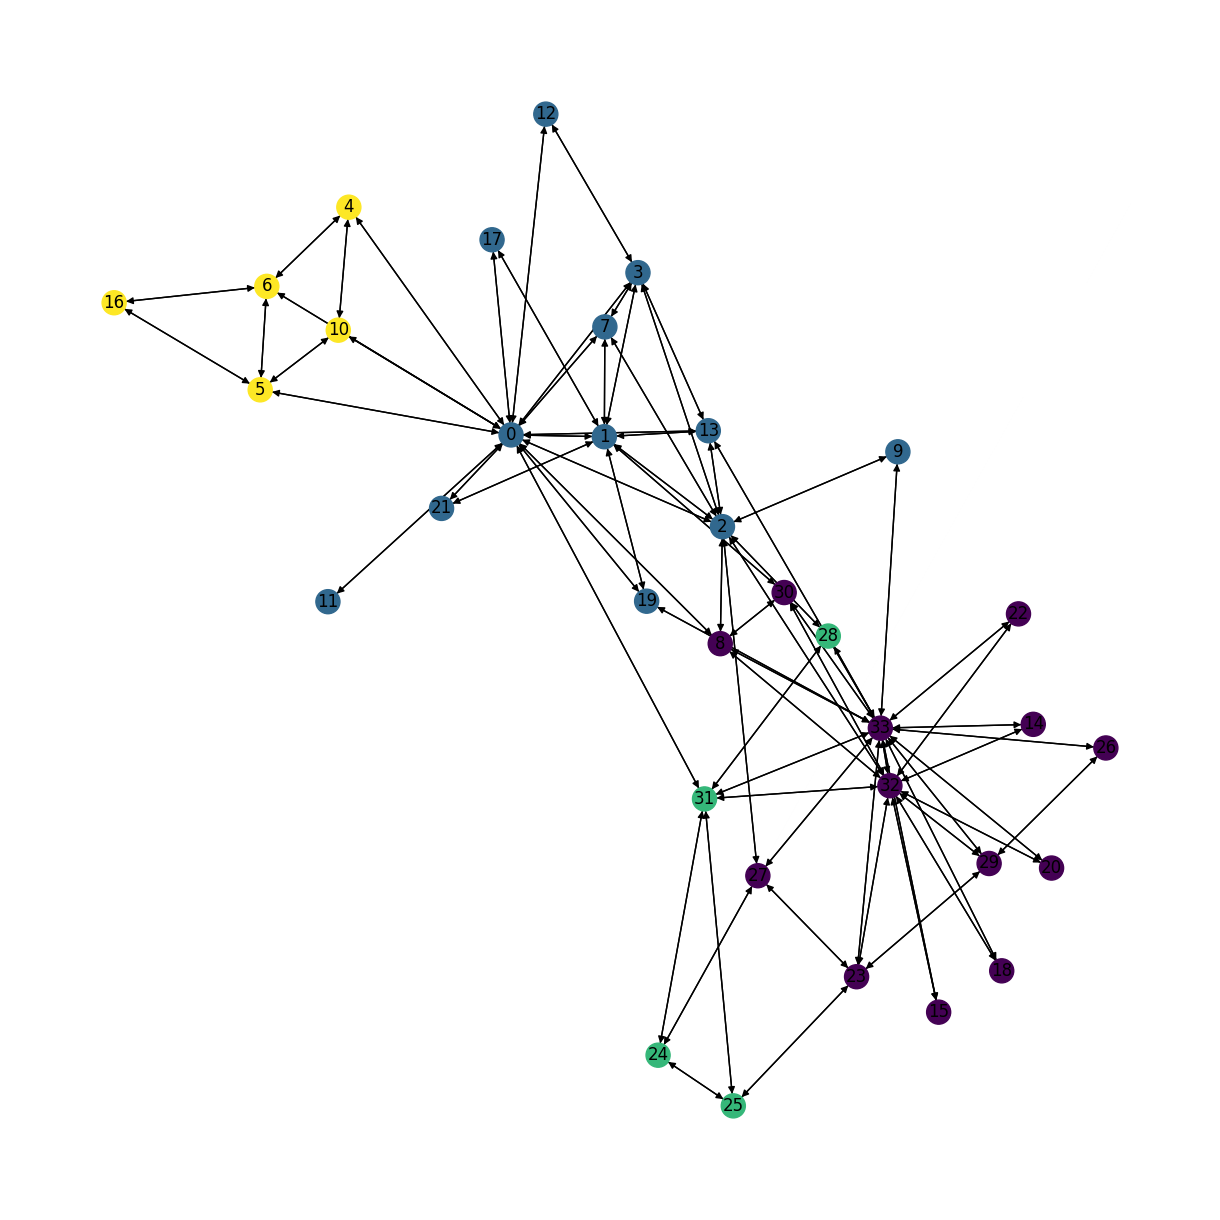

In [72]:
plt.figure(figsize=(12,12))
nx.draw(karate_directed_graph, cmap=plt.get_cmap('viridis'), with_labels=True, node_color=data.y)
# 4 classes ae visualize

In [73]:
print(f'Number of directed edges for the Karate Club graph: {karate_directed_graph.number_of_edges()}')
print(f'Karate Club edges: {karate_directed_graph.edges()}')

Number of directed edges for the Karate Club graph: 156
Karate Club edges: [(0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (0, 8), (0, 10), (0, 11), (0, 12), (0, 13), (0, 17), (0, 19), (0, 21), (0, 31), (1, 0), (1, 2), (1, 3), (1, 7), (1, 13), (1, 17), (1, 19), (1, 21), (1, 30), (2, 0), (2, 1), (2, 3), (2, 7), (2, 8), (2, 9), (2, 13), (2, 27), (2, 28), (2, 32), (3, 0), (3, 1), (3, 2), (3, 7), (3, 12), (3, 13), (4, 0), (4, 6), (4, 10), (5, 0), (5, 6), (5, 10), (5, 16), (6, 0), (6, 4), (6, 5), (6, 16), (7, 0), (7, 1), (7, 2), (7, 3), (8, 0), (8, 2), (8, 30), (8, 32), (8, 33), (9, 2), (9, 33), (10, 0), (10, 4), (10, 5), (11, 0), (12, 0), (12, 3), (13, 0), (13, 1), (13, 2), (13, 3), (13, 33), (14, 32), (14, 33), (15, 32), (15, 33), (16, 5), (16, 6), (17, 0), (17, 1), (18, 32), (18, 33), (19, 0), (19, 1), (19, 33), (20, 32), (20, 33), (21, 0), (21, 1), (22, 32), (22, 33), (23, 25), (23, 27), (23, 29), (23, 32), (23, 33), (24, 25), (24, 27), (24, 31), (25, 23), (25, 24), (25, 31), (

In [74]:
print(karate_directed_graph.number_of_nodes())
karate_directed_graph.degree

34


DiDegreeView({0: 32, 1: 18, 2: 20, 3: 12, 4: 6, 5: 8, 6: 8, 7: 8, 8: 10, 9: 4, 10: 6, 11: 2, 12: 4, 13: 10, 14: 4, 15: 4, 16: 4, 17: 4, 18: 4, 19: 6, 20: 4, 21: 4, 22: 4, 23: 10, 24: 6, 25: 6, 26: 4, 27: 8, 28: 6, 29: 8, 30: 8, 31: 12, 32: 24, 33: 34})

In [82]:
print(f'Number of nodes: {karate_directed_graph.number_of_nodes()}')
karate_directed_graph.number_of_nodes()
karate_directed_graph.degree

Number of nodes: 34


DiDegreeView({0: 32, 1: 18, 2: 20, 3: 12, 4: 6, 5: 8, 6: 8, 7: 8, 8: 10, 9: 4, 10: 6, 11: 2, 12: 4, 13: 10, 14: 4, 15: 4, 16: 4, 17: 4, 18: 4, 19: 6, 20: 4, 21: 4, 22: 4, 23: 10, 24: 6, 25: 6, 26: 4, 27: 8, 28: 6, 29: 8, 30: 8, 31: 12, 32: 24, 33: 34})

In [85]:
nx.to_numpy_array(karate_directed_graph)

array([[0., 1., 1., ..., 1., 0., 0.],
       [1., 0., 1., ..., 0., 0., 0.],
       [1., 1., 0., ..., 0., 1., 0.],
       ...,
       [1., 0., 0., ..., 0., 1., 1.],
       [0., 0., 1., ..., 1., 0., 1.],
       [0., 0., 0., ..., 1., 1., 0.]])

In [84]:
nx.to_numpy_array(karate_undirected_graph)

array([[0., 1., 1., ..., 1., 0., 0.],
       [1., 0., 1., ..., 0., 0., 0.],
       [1., 1., 0., ..., 0., 1., 0.],
       ...,
       [1., 0., 0., ..., 0., 1., 1.],
       [0., 0., 1., ..., 1., 0., 1.],
       [0., 0., 0., ..., 1., 1., 0.]])